# Game theory paper script

Create the plots using the functions defined in the methods section.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Characteristic function - static analysis

In [2]:
# Function to plot based on custom assumptions
def plot_knowledge_value(k_m, k_a, b_omega, external_knowledge_levels):
    """
    Plots the characteristic function values for various scenarios based on custom inputs.

    Parameters:
    - k_m: Baseline knowledge level of the Master Surgeon
    - k_a: Baseline knowledge level of the Apprentice
    - b_tau: Knowledge gained through collaboration
    - external_knowledge_levels: List of external knowledge values to consider
    """
    
    # Calculate values for each scenario
    master_alone = k_m
    apprentice_alone = k_a
    coalition_without_external = k_m + k_a + b_tau
    coalition_with_external = [k_m + k_a + b_tau + e for e in external_knowledge_levels]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(['Master Alone'], [master_alone], marker='o', label='Master Alone (k_m)')
    plt.plot(['Apprentice Alone'], [apprentice_alone], marker='o', label='Apprentice Alone (k_a)')
    plt.plot(['Coalition Without External'], [coalition_without_external], marker='o', label='Coalition Without External (k_m + k_a + b(tau))')
    plt.plot(['Coalition With External' + f" (e={e})" for e in external_knowledge_levels], coalition_with_external, marker='o', label='Coalition With External (k_m + k_a + b(tau) + e(tau))')

    # Titles and Labels
    plt.title('Impact of External Knowledge on Characteristic Function Value')
    plt.xlabel('Scenarios')
    plt.ylabel('Characteristic Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()




### Characteristic function - analysis over time

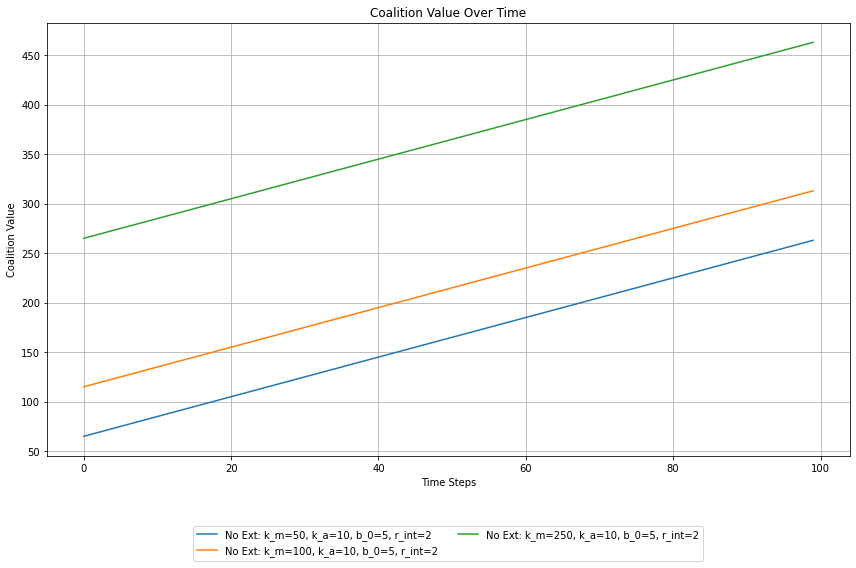

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def coalition_value_over_time(k_m_values, k_a_values, b_0_values, r_internal_values, e_0_values, r_external_values, time_steps):
    """
    Calculates and plots coalition values with internal linear growth and external exponential growth over time
    for multiple values of each parameter. Avoids duplicate plots when only one value is provided for a parameter.
    
    Parameters:
    - k_m_values: List of baseline knowledge values for Master Surgeon
    - k_a_values: List of baseline knowledge values for Apprentice
    - b_0_values: List of initial collaborative knowledge gain values
    - r_internal_values: List of linear growth rates for internal knowledge (collaboration)
    - e_0_values: List of initial external knowledge values
    - r_external_values: List of growth rates for external knowledge
    - time_steps: Number of time steps to simulate
    """
    # Convert single values to lists if they are not already lists
    if not isinstance(k_m_values, list): k_m_values = [k_m_values]
    if not isinstance(k_a_values, list): k_a_values = [k_a_values]
    if not isinstance(b_0_values, list): b_0_values = [b_0_values]
    if not isinstance(r_internal_values, list): r_internal_values = [r_internal_values]
    if not isinstance(e_0_values, list): e_0_values = [e_0_values]
    if not isinstance(r_external_values, list): r_external_values = [r_external_values]
    
    # Time steps
    t = np.arange(0, time_steps)
    
    # Set the figure size
    plt.figure(figsize=(12, 8))
    
    # Loop over all unique combinations of parameters
    for k_m in k_m_values:
        for k_a in k_a_values:
            for b_0 in b_0_values:
                for r_internal in r_internal_values:
                    for e_0 in e_0_values:
                        for r_external in r_external_values:
                            # Calculate internal and external knowledge growth over time
                            b_t = b_0 + r_internal * t  # Linear growth
                            
                            if r_external == 0:
                                # If no external growth, plot only one line
                                coalition = k_m + k_a + b_t
                                label = f'No Ext: k_m={k_m}, k_a={k_a}, b_0={b_0}, r_int={r_internal}'
                                plt.plot(t, coalition, label=label)
                            else:
                                # If external growth exists, plot two lines
                                e_t = e_0 * (1 + r_external) ** t  # Exponential growth
                                coalition_without_external = k_m + k_a + b_t
                                coalition_with_external = k_m + k_a + b_t + e_t
                                
                                label_without_ext = f'No Ext: k_m={k_m}, k_a={k_a}, b_0={b_0}, r_int={r_internal}'
                                label_with_ext = f'With Ext: k_m={k_m}, k_a={k_a}, b_0={b_0}, r_int={r_internal}, e_0={e_0}, r_ext={r_external}'
                                
                                plt.plot(t, coalition_without_external, linestyle='--', label=label_without_ext)
                                plt.plot(t, coalition_with_external, label=label_with_ext)

    # Titles and Labels
    plt.title('Coalition Value Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Coalition Value')
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)  # Adjust ncol as needed
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for the larger figure
    plt.show()

# Usage example
k_m_values = [50, 100, 250]
k_a_values = [10]
b_0_values = [5]
r_internal_values = [2]
e_0_values = [0]
r_external_values = [0]  # Includes a zero growth rate case
time_steps = 100

coalition_value_over_time(k_m_values, k_a_values, b_0_values, r_internal_values, e_0_values, r_external_values, time_steps)


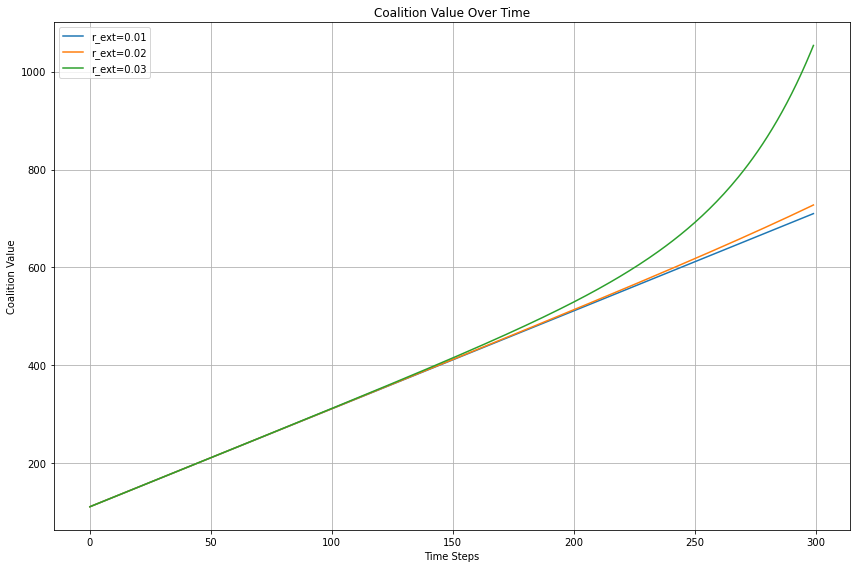

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def coalition_value_over_time(k_m_values, k_a_values, b_0_values, r_internal_values, e_0_values, r_external_values, time_steps):
    """
    Calculates and plots coalition values with internal linear growth and external exponential growth over time
    for multiple values of each parameter. Avoids duplicate plots when only one value is provided for a parameter.
    
    Parameters:
    - k_m_values: List of baseline knowledge values for Master Surgeon
    - k_a_values: List of baseline knowledge values for Apprentice
    - b_0_values: List of initial collaborative knowledge gain values
    - r_internal_values: List of linear growth rates for internal knowledge (collaboration)
    - e_0_values: List of initial external knowledge values
    - r_external_values: List of growth rates for external knowledge
    - time_steps: Number of time steps to simulate
    """
    # Convert single values to lists if they are not already lists
    if not isinstance(k_m_values, list): k_m_values = [k_m_values]
    if not isinstance(k_a_values, list): k_a_values = [k_a_values]
    if not isinstance(b_0_values, list): b_0_values = [b_0_values]
    if not isinstance(r_internal_values, list): r_internal_values = [r_internal_values]
    if not isinstance(e_0_values, list): e_0_values = [e_0_values]
    if not isinstance(r_external_values, list): r_external_values = [r_external_values]
    
    # Identify which parameters are lists (i.e., have multiple values)
    params = {
        "k_m": k_m_values,
        "k_a": k_a_values,
        "b_0": b_0_values,
        "r_int": r_internal_values,
        "e_0": e_0_values,
        "r_ext": r_external_values
    }
    varying_params = {k: v for k, v in params.items() if len(v) > 1}
    
    # Time steps
    t = np.arange(0, time_steps)
    
    # Set the figure size
    plt.figure(figsize=(12, 8))
    
    # Loop over all unique combinations of parameters
    for k_m in k_m_values:
        for k_a in k_a_values:
            for b_0 in b_0_values:
                for r_internal in r_internal_values:
                    for e_0 in e_0_values:
                        for r_external in r_external_values:
                            # Calculate internal knowledge growth over time
                            b_t = b_0 + r_internal * t  # Linear growth
                            
                            if r_external == 0:
                                # If no external growth, plot only one line
                                coalition = k_m + k_a + b_t
                                varying_values = {
                                    "k_m": k_m,
                                    "k_a": k_a,
                                    "b_0": b_0,
                                    "r_int": r_internal
                                }
                                label_components = [f"{key}={value}" for key, value in varying_values.items() if key in varying_params]
                                label = ", ".join(label_components)
                                plt.plot(t, coalition, label=f"{label}")
                            else:
                                # If external growth exists, plot only "with external knowledge"
                                e_t = e_0 * (1 + r_external) ** t  # Exponential growth
                                coalition_with_external = k_m + k_a + b_t + e_t
                                
                                varying_values = {
                                    "k_m": k_m,
                                    "k_a": k_a,
                                    "b_0": b_0,
                                    "r_int": r_internal,
                                    "e_0": e_0,
                                    "r_ext": r_external
                                }
                                label_components = [f"{key}={value}" for key, value in varying_values.items() if key in varying_params]
                                label = ", ".join(label_components)
                                
                                plt.plot(t, coalition_with_external, label=f"{label}")

    # Titles and Labels
    plt.title('Coalition Value Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Coalition Value')
    
    # Place legend inside the plot
    plt.legend(loc="upper left", fontsize=10, frameon=True)
    
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for the larger figure
    plt.show()

# Usage example
k_m_values = [100]
k_a_values = [10]
b_0_values = [1]
r_internal_values = [2]
e_0_values = [0.05]
r_external_values = [0.01, 0.02, 0.03]  # Includes a zero growth rate case
time_steps = 300

coalition_value_over_time(k_m_values, k_a_values, b_0_values, r_internal_values, e_0_values, r_external_values, time_steps)




v4, with sliders

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

def coalition_value_plot(k_m, k_a, b_0, r_internal, e_0, r_external, time_steps):
    """
    Calculates and plots coalition values with internal linear growth and external exponential growth over time
    based on slider inputs.
    
    Parameters:
    - k_m: Baseline knowledge of Master Surgeon
    - k_a: Baseline knowledge of Apprentice
    - b_0: Initial collaborative knowledge gain
    - r_internal: Linear growth rate of internal knowledge (collaboration)
    - e_0: Initial external knowledge
    - r_external: Growth rate of external knowledge
    - time_steps: Number of time steps to simulate
    """
    
    # Time steps
    t = np.arange(0, time_steps)
    
    # Internal and external knowledge growth over time
    b_t = b_0 + r_internal * t  # Linear growth
    e_t = e_0 * (1 + r_external) ** t  # Exponential growth
    
    # Coalition values over time with and without external knowledge
    coalition_without_external = k_m + k_a + b_t
    coalition_with_external = k_m + k_a + b_t + e_t
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t, coalition_without_external, linestyle='--', label='Coalition Without External Knowledge')
    plt.plot(t, coalition_with_external, label='Coalition With External Knowledge')
    
    # Titles and Labels
    plt.title('Coalition Value Over Time With and Without External Knowledge')
    plt.xlabel('Time Steps')
    plt.ylabel('Coalition Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
interactive_plot = interactive(
    coalition_value_plot,
    k_m=widgets.FloatSlider(value=50, min=0, max=100, step=1, description='k_m'),
    k_a=widgets.FloatSlider(value=25, min=0, max=50, step=1, description='k_a'),
    b_0=widgets.FloatSlider(value=1, min=0, max=5, step=0.1, description='b_0'),
    r_internal=widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='r_internal'),
    e_0=widgets.FloatSlider(value=0.01, min=0, max=1, step=0.01, description='e_0'),
    r_external=widgets.FloatSlider(value=0.1, min=0, max=2, step=0.01, description='r_external'),
    time_steps=widgets.IntSlider(value=250, min=50, max=1000, step=10, description='time_steps')
)

# Display interactive plot with sliders
display(interactive_plot)


interactive(children=(FloatSlider(value=50.0, description='k_m', step=1.0), FloatSlider(value=25.0, descriptio…

##### Time to proficiency

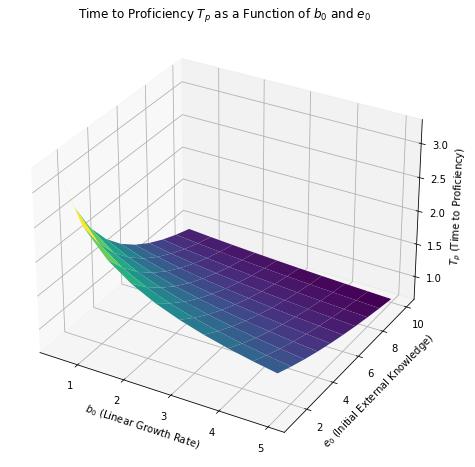

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the functions b(tau) and e(tau)
def b(tau, b0):
    return b0 * tau  # Linear growth

def e(tau, e0, g):
    return e0 * np.exp(g * tau)  # Exponential growth

# Define the equation to solve: T_p = P_threshold / [r * (b(T_p) + e(T_p))]
def equation(T_p, P_threshold, r, b0, e0, g):
    return T_p - P_threshold / (r * (b(T_p, b0) + e(T_p, e0, g)))

# Function to solve for T_p
def solve_Tp(P_threshold, r, b0, e0, g, initial_guess=1.0):
    Tp_solution, = fsolve(equation, initial_guess, args=(P_threshold, r, b0, e0, g))
    return Tp_solution

# Parameters (you can modify these)
P_threshold = 100  # Required proficiency level (knowledge units)
r = 10             # Procedures per unit time
g = 0.1            # Growth rate for external resources

# Range of b0 and e0 values to explore
b0_values = np.linspace(0.5, 5.0, 10)   # Linear growth coefficients
e0_values = np.linspace(1.0, 10.0, 10)  # Initial external knowledge

# Meshgrid for plotting
B0, E0 = np.meshgrid(b0_values, e0_values)
Tp = np.zeros_like(B0)

# Solve for T_p across the grid of b0 and e0
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        b0 = B0[i, j]
        e0 = E0[i, j]
        try:
            Tp[i, j] = solve_Tp(P_threshold, r, b0, e0, g)
        except:
            Tp[i, j] = np.nan  # In case of no solution

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(B0, E0, Tp, cmap='viridis')
ax.set_xlabel('$b_0$ (Linear Growth Rate)')
ax.set_ylabel('$e_0$ (Initial External Knowledge)')
ax.set_zlabel('$T_p$ (Time to Proficiency)')
ax.set_title('Time to Proficiency $T_p$ as a Function of $b_0$ and $e_0$')

plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display

# Define the functions b(tau) and e(tau)
def b(tau, b0):
    return b0 * tau  # Linear growth

def e(tau, e0, g):
    return e0 * np.exp(g * tau)  # Exponential growth

# Define the equation to solve: T_p = P_threshold / [r * (b(T_p) + e(T_p))]
def equation(T_p, P_threshold, r, b0, e0, g):
    return T_p - P_threshold / (r * (b(T_p, b0) + e(T_p, e0, g)))

# Function to solve for T_p
def solve_Tp(P_threshold, r, b0, e0, g, initial_guess=1.0):
    Tp_solution, = fsolve(equation, initial_guess, args=(P_threshold, r, b0, e0, g))
    return Tp_solution

# Interactive function
def interactive_Tp(P_threshold=100, r=10, b0=1.0, e0=5.0, g=0.1):
    Tp = solve_Tp(P_threshold, r, b0, e0, g)
    print(f"Time to Proficiency (T_p): {Tp:.2f} time units")

# Create sliders
widgets.interact(
    interactive_Tp,
    P_threshold=widgets.FloatSlider(value=100, min=50, max=200, step=10, description='P_threshold'),
    r=widgets.FloatSlider(value=10, min=1, max=20, step=1, description='r'),
    b0=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='b0'),
    e0=widgets.FloatSlider(value=5.0, min=1.0, max=20.0, step=1.0, description='e0'),
    g=widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.05, description='g')
)


interactive(children=(FloatSlider(value=100.0, description='P_threshold', max=200.0, min=50.0, step=10.0), Flo…

<function __main__.interactive_Tp(P_threshold=100, r=10, b0=1.0, e0=5.0, g=0.1)>

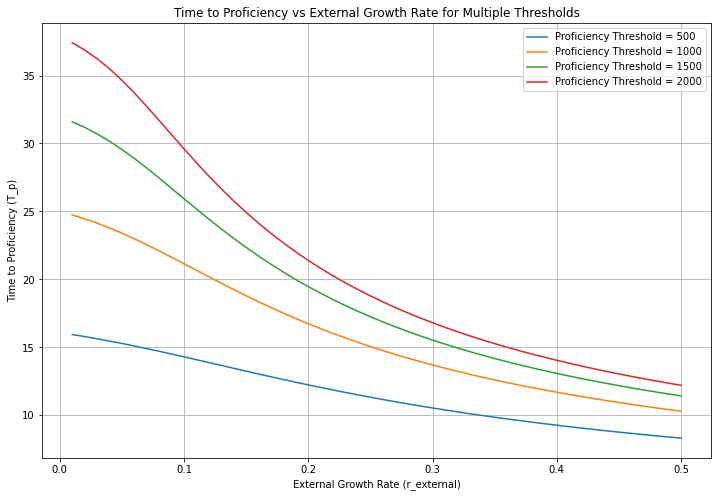

In [6]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parameters
proficiency_thresholds = [500, 1000, 1500, 2000]  # List of proficiency thresholds
b_0 = 10             # Initial internal knowledge gain
r_internal = 2       # Internal knowledge growth rate
e_0 = 5              # Initial external knowledge level
r_external_values = np.linspace(0.01, 0.5, 50)  # Range of external growth rates

# Define the proficiency equation to solve for T_p
def proficiency_equation(T_p, P_threshold, b_0, r_internal, e_0, r_external):
    term1 = b_0 * T_p
    term2 = (r_internal * T_p**2) / 2
    if r_external > 0:
        term3 = (e_0 / np.log(1 + r_external)) * ((1 + r_external)**T_p - 1)
    else:
        term3 = e_0 * T_p  # Handle edge case where r_external = 0
    return term1 + term2 + term3 - P_threshold

# Solve for T_p for each r_external and each proficiency threshold
T_p_results = {}

for P_threshold in proficiency_thresholds:
    T_p_values = []
    for r_external in r_external_values:
        T_p_initial_guess = 10  # Initial guess for T_p
        T_p_solution = fsolve(proficiency_equation, T_p_initial_guess,
                              args=(P_threshold, b_0, r_internal, e_0, r_external))
        T_p_values.append(T_p_solution[0])
    T_p_results[P_threshold] = T_p_values

# Plot results
plt.figure(figsize=(12, 8))
for P_threshold, T_p_values in T_p_results.items():
    plt.plot(r_external_values, T_p_values, label=f"Proficiency Threshold = {P_threshold}")

plt.xlabel("External Growth Rate (r_external)")
plt.ylabel("Time to Proficiency (T_p)")
plt.title("Time to Proficiency vs External Growth Rate for Multiple Thresholds")
plt.legend()
plt.grid(True)
plt.show()



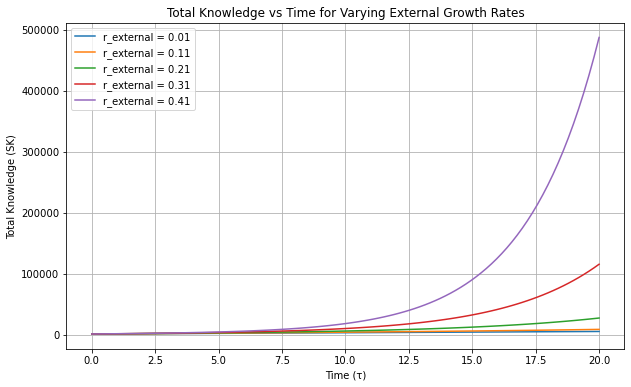

In [4]:
###### Total Knowledge vs Time for Varying External Growth Rates

import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 100  # Number of surgeons
b_0 = 10  # Baseline internal knowledge gain
r_internal_avg = 2  # Average internal growth rate per surgeon
e_0 = 5  # Initial external knowledge level
r_external_values = np.linspace(0.01, 0.5, 50)  # Range of external growth rates
tau = np.linspace(0, 20, 100)  # Time steps

# Compute SK for varying r_external
SK_values = []
for r_external in r_external_values:
    SK_tau = m * b_0 + tau * (m * r_internal_avg) + m * e_0 * ((1 + r_external) ** tau)
    SK_values.append(SK_tau)

# Plot results for several r_external values
plt.figure(figsize=(10, 6))
for i, r_external in enumerate(r_external_values[::10]):  # Select a few external rates for clarity
    plt.plot(tau, SK_values[i * 10], label=f"r_external = {r_external:.2f}")

plt.xlabel("Time (τ)")
plt.ylabel("Total Knowledge (SK)")
plt.title("Total Knowledge vs Time for Varying External Growth Rates")
plt.legend()
plt.grid(True)
plt.show()


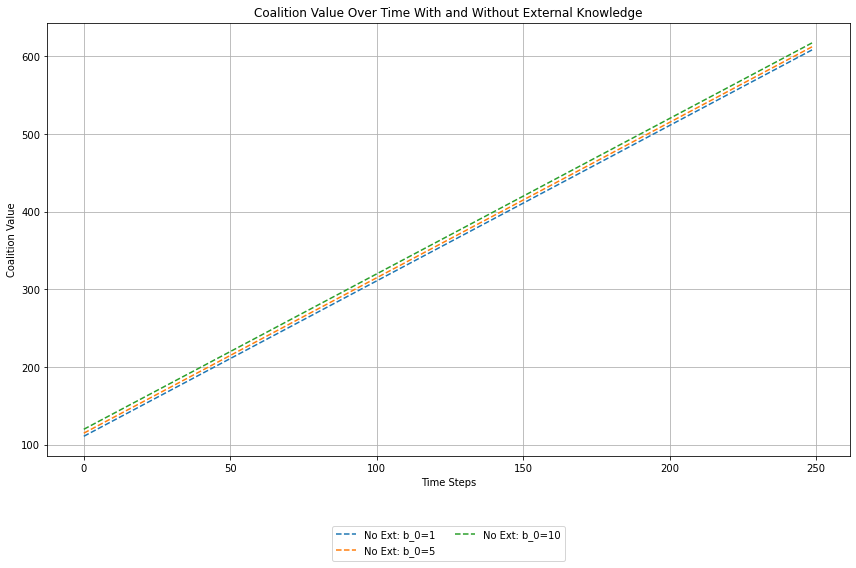

In [2]:
## Plot parameters v2

import numpy as np
import matplotlib.pyplot as plt

def coalition_value_over_time(k_m_values, k_a_values, b_0_values, r_internal_values, e_0_values, r_external_values, time_steps):
    """
    Calculates and plots coalition values with internal linear growth and external exponential growth over time
    for multiple values of each parameter. Avoids duplicate plots when only one value is provided for a parameter.
    
    Parameters:
    - k_m_values: List of baseline knowledge values for Master Surgeon
    - k_a_values: List of baseline knowledge values for Apprentice
    - b_0_values: List of initial collaborative knowledge gain values
    - r_internal_values: List of linear growth rates for internal knowledge (collaboration)
    - e_0_values: List of initial external knowledge values
    - r_external_values: List of growth rates for external knowledge
    - time_steps: Number of time steps to simulate
    """
    # Convert single values to lists if they are not already lists
    if not isinstance(k_m_values, list): k_m_values = [k_m_values]
    if not isinstance(k_a_values, list): k_a_values = [k_a_values]
    if not isinstance(b_0_values, list): b_0_values = [b_0_values]
    if not isinstance(r_internal_values, list): r_internal_values = [r_internal_values]
    if not isinstance(e_0_values, list): e_0_values = [e_0_values]
    if not isinstance(r_external_values, list): r_external_values = [r_external_values]
    
    # Time steps
    t = np.arange(0, time_steps)
    
    # Find which parameters vary
    params = {
        "k_m": k_m_values,
        "k_a": k_a_values,
        "b_0": b_0_values,
        "r_int": r_internal_values,
        "e_0": e_0_values,
        "r_ext": r_external_values
    }
    varying_params = {k: v for k, v in params.items() if len(v) > 1}
    
    # Set the figure size
    plt.figure(figsize=(12, 8))
    
    # Loop over all unique combinations of parameters
    for k_m in k_m_values:
        for k_a in k_a_values:
            for b_0 in b_0_values:
                for r_internal in r_internal_values:
                    for e_0 in e_0_values:
                        for r_external in r_external_values:
                            # Calculate internal and external knowledge growth over time
                            b_t = b_0 + r_internal * t  # Linear growth
                            e_t = e_0 * (1 + r_external) ** t  # Exponential growth
                            
                            # Coalition values over time with and without external knowledge
                            coalition_without_external = k_m + k_a + b_t
                            coalition_with_external = k_m + k_a + b_t + e_t
                            
                            # Generate labels dynamically based on varying parameters
                            varying_values = {
                                "k_m": k_m,
                                "k_a": k_a,
                                "b_0": b_0,
                                "r_int": r_internal,
                                "e_0": e_0,
                                "r_ext": r_external
                            }
                            label_components = [f"{key}={value}" for key, value in varying_values.items() if key in varying_params]
                            label = ", ".join(label_components)
                            
                            # Plot each unique scenario
                            plt.plot(t, coalition_without_external, linestyle='--', label=f"No Ext: {label}")
                            #plt.plot(t, coalition_with_external, label=f"With Ext: {label}")

    # Titles and Labels
    plt.title('Coalition Value Over Time With and Without External Knowledge')
    plt.xlabel('Time Steps')
    plt.ylabel('Coalition Value')
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)  # Adjust ncol as needed
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for the larger figure
    plt.show()

# Usage example
k_m_values = [100]
k_a_values = [10]
b_0_values = [1, 5, 10]
r_internal_values = [2]
e_0_values = [0]
r_external_values = [0]
time_steps = 250

coalition_value_over_time(k_m_values, k_a_values, b_0_values, r_internal_values, e_0_values, r_external_values, time_steps)
